## Task 3: Webscraping with Beautiful Soup
**Goal**: We will learn about scraping a webpage with beautiful soup

**Learning Outcomes**: Learn to use beautiful soup to scape different websites. 

**Prerequisites**: Basic understanding of python.

**Resources**: 
- [Beautiful Soup Documentation](https://beautiful-soup-4.readthedocs.io/en/latest/#quick-start)
- [Beautiful Soup Tutorial](https://realpython.com/beautiful-soup-web-scraper-python/)

### Part 1: Introduction to Beautiful Soup
Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with different parsers to provide ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

Here is an example html doc: 
```python
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""
```

You can import BeautifulSoup and create a BeautifulSoup object like follows: 
```python
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
```

Now you can try many differnt ways to navigate the BeauifulSoup data structure below: 

In [1]:
from bs4 import BeautifulSoup

html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

print(soup.title)
# <title>The Dormouse's story</title>

print(soup.title.name)
# u'title'

<title>The Dormouse's story</title>
title


### Part 2: Scraping from the Web 
Where do we get the html/xml pages from? Python's requests library handles HTTP communication by making HTTP requests to web servers (GET, POST, etc,). This library will help us retrieve raw HTML content from the website. When we encounter an error, this library handles network related errors. 

```python
import requests
response = requests.get('http://books.toscrape.com/')
```

In [11]:
import requests
response = requests.get('http://books.toscrape.com/')

soup = BeautifulSoup(response.text, 'html.parser')

title = soup.title.text
all_paragraphs = soup.find_all('p')
specific_div = soup.find('div', class_='content')

### Task 1: Build an inventory by scraping a website

Your task is to scrape a book website and collect the prices for all the books you find.

In [4]:
# TASK ONLY
import requests
from bs4 import BeautifulSoup
import pandas as pd

# This is the url of the website we will scrape
base_url = 'http://books.toscrape.com/'
book_inventory = {} # store you results in this dictionary here

### YOUR CODE STARTS HERE
# Your task is to scrape a book website and collect the prices for all the books you find. 
# make sure you store the results in the book_inventory dictionary with the price as a float
# make sure you scrape all the pages so you have 1000 books in total


### YOUR CODE ENDS HERE

all_books_df = pd.DataFrame.from_dict(book_inventory, orient='index', columns=['Price']) # your book inventory should be a dictionary with the book title as the key and the price as the value
all_books_df.describe()

,Price
count,0
unique,0
top,NaN
freq,NaN


In [ ]:
# CLAUDE CODE
import requests
from bs4 import BeautifulSoup
import pandas as pd

# This is the url of the website we will scrape
base_url = 'http://books.toscrape.com/'
book_inventory = {} # store you results in this dictionary here

### YOUR CODE STARTS HERE
# Your task is to scrape a book website and collect the prices for all the books you find. 
# make sure you store the results in the book_inventory dictionary with the price as a float
# make sure you scrape all the pages so you have 1000 books in total
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    
    for book in books:
        title = book.h3.a['title']
        price = float(book.select_one('p.price_color').text.strip('£'))
        book_inventory[title] = price

def get_next_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    next_button = soup.select_one('li.next > a')
    if next_button:
        return base_url + next_button['href']
    return None

current_url = base_url + 'catalogue/page-1.html'

while current_url and len(book_inventory) < 1000:
    scrape_page(current_url)
    current_url = get_next_page(current_url)

### YOUR CODE ENDS HERE

all_books_df = pd.DataFrame.from_dict(book_inventory, orient='index', columns=['Price']) # your book inventory should be a dictionary with the book title as the key and the price as the value
all_books_df.describe()

In [5]:
# MY CODE

import pandas as pd

# This is the url of the website we will scrape
base_url = 'http://books.toscrape.com/'
book_inventory = {} # store you results in this dictionary here

### YOUR CODE STARTS HERE
# Your task is to scrape a book website and collect the prices for all the books you find. 
# make sure you store the results in the book_inventory dictionary with the price as a float
# make sure you scrape all the pages so you have 1000 books in total

response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser', from_encoding='utf-8')
NUM_PAGES=0 
while True: 
    all_books = soup.find_all('article', class_='product_pod')
    if len(all_books) != 20: 
        print(all_books)
    for book in all_books:
        title = book.find('h3').find('a')['title']
        price = book.find('p', class_='price_color').text
        book_inventory[title] = float(price.split('£')[1])
    
    next_page = soup.select_one('li.next')
    if not next_page:
        break
    url = base_url + 'catalogue/' + next_page.find('a')['href'].split('/')[-1]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser', from_encoding='utf-8')
    NUM_PAGES+=1 
### YOUR CODE ENDS HERE

all_books_df = pd.DataFrame.from_dict(book_inventory, orient='index', columns=['Price']) # your book inventory should be a dictionary with the book title as the key and the price as the value
all_books_df.describe()

/Users/jhs/Code/AFP/skill-dev/.venv/lib/python3.13/site-packages/bs4/__init__.py:339: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn(


,Price
count,999.000000
mean,35.059389
std,14.449765
min,10.000000
25%,22.105000
50%,35.960000
75%,47.475000
max,59.990000


### Task 2: Scraping Wikipedia

In this next task, we want to construct a table of the largest cities in the world and plot the scatter plot of population to land area

/Users/jhs/Code/AFP/skill-dev/.venv/lib/python3.13/site-packages/bs4/__init__.py:339: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn(
/var/folders/jc/ctcxyx_55yqb7m0dg7sj4clm0000gn/T/ipykernel_63355/3541119135.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  read_table = pd.read_html(str(population_wikitable))[0]


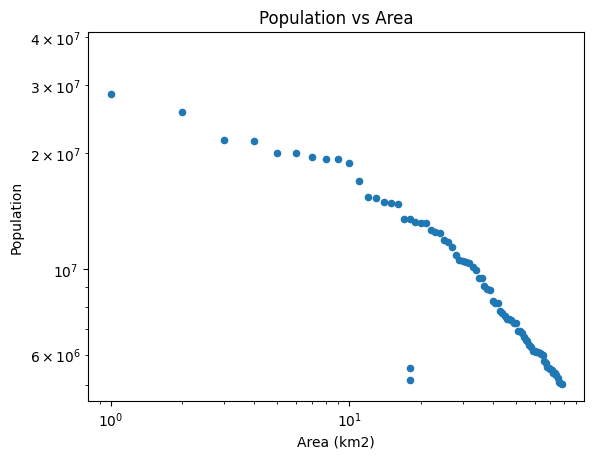

In [62]:
base_url =  'https://en.wikipedia.org/wiki/List_of_largest_cities'

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

response = requests.get(base_url)
soup = BeautifulSoup(response.text, 'html.parser', from_encoding='utf-8')


### YOUR CODE STARTS HERE
# Step 1: Find the table tag by inspecting the webpage
tables = soup.find_all('table', class_='wikitable')
population_wikitable = tables[0]

# Step 2: Use pd.read_html to read the table
read_table = pd.read_html(str(population_wikitable))[0]

# Step 3: Process the table to get the city, country, and population
read_table.columns = [f"{col[0]}_{col[1]}" if col[0] else f"{col[1]}" for col in read_table.columns]

population_key = 'UN 2018 population estimates[b]_UN 2018 population estimates[b]'
city_key = 'City[a]_City[a]'
country_key = 'Country_Country'
area_key = 'City proper[c]_Area (km2)'

### YOUR CODE ENDS HERE

population_df = read_table[[city_key, country_key, population_key, area_key]]
population_df.plot.scatter(x=area_key, y=population_key) 
plt.xlabel('Area (km2)')
plt.ylabel('Population')
plt.title('Population vs Area')
plt.yscale('log')
plt.xscale('log')
plt.show()

### YOUR CODE ENDS HERE
print()